In [1]:
from phugoid import plot_flight_path

In [2]:
help(plot_flight_path)

Help on function plot_flight_path in module phugoid:

plot_flight_path(zt, z0, theta0, N=1000)
    Plots the flight path of the glider.
    
    Parameters
    ----------
    zt : float
        Trim height of the glider.
    z0 : float
        Initial height of the glider.
    theta0 : float
        Initial orientation of the glider (in degrees).
    N : integer, optional
        Number of points used to discretize the path;
        default: 1000.



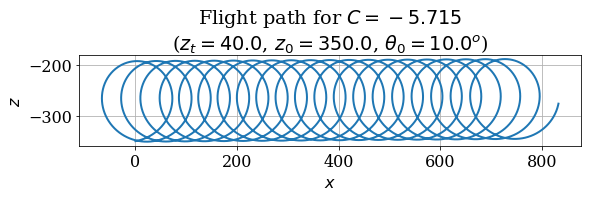

In [3]:
zt_in = 40
z0_in = 350
theta0_in = 10
N_in = 10000
plot_flight_path(zt_in, z0_in, theta0_in, N_in)

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 16

T = 100.0 #seconds
dt = 0.01 #seconds

t_array = np.arange(0.0,T + dt,dt)
N = len(t_array)

In [5]:
z0 = 100.0 #altitude
b0 = 10.0 #gust thrust (upwards)
zt = 100.0 #trim altitude
g =  9.81 #gravitas

state = np.array([z0, b0])
z = np.zeros(N)
z[0] = z0

z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t_array) +
           (z0 - zt) * np.cos((g / zt)**0.5 * t_array) + zt)

In [6]:
for n in range(1, N):
    rhs = np.array([state[1], g * (1 - state[0] / zt)])
    state = state + dt * rhs
    z[n] = state[0]

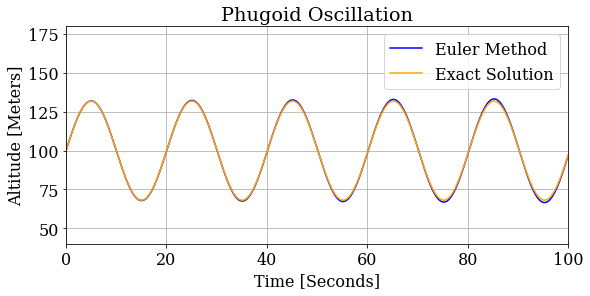

In [7]:
plt.figure(figsize=(9.0,4.0))
plt.grid()
plt.xlabel("Time [Seconds]")
plt.ylabel("Altitude [Meters]")
plt.title("Phugoid Oscillation")
plt.xlim(t_array[0], t_array[-1])
plt.ylim(40.0, 180.0)
plt.plot(t_array, z, color='b', label='Euler Method')
plt.plot(t_array, z_exact, color = 'orange', label='Exact Solution')
plt.legend(loc='upper right')

In [ ]:
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0001]
z_vals = []
T=10000

for dt in dt_values:
    N = int(T / dt) + 1
    t = np.linspace(0.0, T, num=N)
    state2 = np.array([z0,b0])
    z = np.empty_like(t)
    z[0] = z0
    
    for n in range(1,N):
        rhs = np.array([state2[1], g * (1 - state2[0] / zt)])
        state2 = state2 + dt * rhs
        z[n] = state2[0]
    z_vals.append(z)

In [ ]:
def l1_error(z, z_exact, dt):
    """
    Computes error between numerical and exact solutions
    in the L1 norm
    
    Parameters
    ===============
    z       = numerical solution (numpy array)
    z_exact = analytical solution (numpy array)
    dt      = time step (float)
    
    Returns
    ===============
    error   = L1-norm of error w.r.t. exact solution (float)
    """
    error = dt * np.sum(np.abs(z - z_exact))
    return error

In [ ]:
error_values = []

for z, dt in zip(z_vals, dt_values):
    N = int(T / dt) + 1
    t = np.linspace(0.0, T, num=N)
    z_exact = (b0 * (zt / g)**0.5 * np.sin((g / zt)**0.5 * t) +
               (z0 - zt) * np.cos((g / zt)**0.5 * t) + zt)
    error_values.append(l1_error(z, z_exact, dt))

In [ ]:
plt.figure(figsize=(6.0,6.0))
plt.title('L1-norm Error vs. Time-Step Size')
plt.xlabel('$\Delta t$')
plt.ylabel('Error')
plt.grid()
plt.loglog(dt_values, error_values, color = 'purple', linestyle='--',
          marker='o')

In [ ]:
# Plot the error versus the time-step size.
plt.figure(figsize=(6.0, 6.0))
plt.title('L1-norm error vs. time-step size')  # set the title
plt.xlabel('$\Delta t$')  # set the x-axis label
plt.ylabel('Error')  # set the y-axis label
plt.grid()
plt.loglog(dt_values, error_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
plt.axis('equal');  # make axes scale equally